In [147]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

import warnings
warnings.filterwarnings("ignore")


from sklearn.metrics import mean_squared_error
from math import sqrt

%matplotlib inline
from pandas.plotting import register_matplotlib_converters

from statsmodels.tsa.api import Holt

In [18]:

glt_mcity = pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')

print (glt_mcity.City.unique())
print (glt_mcity.head())
print (glt_mcity.shape)


['Abidjan' 'Addis Abeba' 'Ahmadabad' 'Aleppo' 'Alexandria' 'Ankara'
 'Baghdad' 'Bangalore' 'Bangkok' 'Belo Horizonte' 'Berlin' 'Bogotá'
 'Bombay' 'Brasília' 'Cairo' 'Calcutta' 'Cali' 'Cape Town' 'Casablanca'
 'Changchun' 'Chengdu' 'Chicago' 'Chongqing' 'Dakar' 'Dalian'
 'Dar Es Salaam' 'Delhi' 'Dhaka' 'Durban' 'Faisalabad' 'Fortaleza' 'Gizeh'
 'Guangzhou' 'Harare' 'Harbin' 'Ho Chi Minh City' 'Hyderabad' 'Ibadan'
 'Istanbul' 'Izmir' 'Jaipur' 'Jakarta' 'Jiddah' 'Jinan' 'Kabul' 'Kano'
 'Kanpur' 'Karachi' 'Kiev' 'Kinshasa' 'Lagos' 'Lahore' 'Lakhnau' 'Lima'
 'London' 'Los Angeles' 'Luanda' 'Madras' 'Madrid' 'Manila' 'Mashhad'
 'Melbourne' 'Mexico' 'Mogadishu' 'Montreal' 'Moscow' 'Nagoya' 'Nagpur'
 'Nairobi' 'Nanjing' 'New Delhi' 'New York' 'Paris' 'Peking' 'Pune'
 'Rangoon' 'Rio De Janeiro' 'Riyadh' 'Rome' 'São Paulo' 'Saint Petersburg'
 'Salvador' 'Santiago' 'Santo Domingo' 'Seoul' 'Shanghai' 'Shenyang'
 'Singapore' 'Surabaya' 'Surat' 'Sydney' 'Taipei' 'Taiyuan' 'Tangshan'
 'Tianjin' 'Toky

In [19]:
mexico_data = glt_mcity[glt_mcity['City'] == 'Mexico'] 

In [20]:
mexico_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2145 entries, 147847 to 149991
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   dt                             2145 non-null   object 
 1   AverageTemperature             2145 non-null   float64
 2   AverageTemperatureUncertainty  2145 non-null   float64
 3   City                           2145 non-null   object 
 4   Country                        2145 non-null   object 
 5   Latitude                       2145 non-null   object 
 6   Longitude                      2145 non-null   object 
dtypes: float64(2), object(5)
memory usage: 134.1+ KB


In [21]:
mexico_data.dt= pd.to_datetime(mexico_data.dt)
mexico_data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
147847,1835-01-01,13.086,1.942,Mexico,Mexico,20.09N,98.96W
147848,1835-02-01,12.322,2.020,Mexico,Mexico,20.09N,98.96W
147849,1835-03-01,13.874,2.271,Mexico,Mexico,20.09N,98.96W
147850,1835-04-01,16.312,2.247,Mexico,Mexico,20.09N,98.96W
147851,1835-05-01,16.851,1.893,Mexico,Mexico,20.09N,98.96W


In [22]:
mexico_data=mexico_data.reset_index()

In [23]:
mexico_data = mexico_data.replace(to_replace="Mexico", value="Mexico City, Mexico")
mexico_data.head()

,index,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,147847,1835-01-01,13.086,1.942,"Mexico City, Mexico","Mexico City, Mexico",20.09N,98.96W
1,147848,1835-02-01,12.322,2.020,"Mexico City, Mexico","Mexico City, Mexico",20.09N,98.96W
2,147849,1835-03-01,13.874,2.271,"Mexico City, Mexico","Mexico City, Mexico",20.09N,98.96W
3,147850,1835-04-01,16.312,2.247,"Mexico City, Mexico","Mexico City, Mexico",20.09N,98.96W
4,147851,1835-05-01,16.851,1.893,"Mexico City, Mexico","Mexico City, Mexico",20.09N,98.96W


In [24]:
mexico_data = mexico_data.drop(['index','Latitude','Longitude','Country'], axis=1)
mexico_data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City
0,1835-01-01,13.086,1.942,"Mexico City, Mexico"
1,1835-02-01,12.322,2.020,"Mexico City, Mexico"
2,1835-03-01,13.874,2.271,"Mexico City, Mexico"
3,1835-04-01,16.312,2.247,"Mexico City, Mexico"
4,1835-05-01,16.851,1.893,"Mexico City, Mexico"


In [25]:
mexico_data = mexico_data.round(2)
mexico_data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City
0,1835-01-01,13.09,1.94,"Mexico City, Mexico"
1,1835-02-01,12.32,2.02,"Mexico City, Mexico"
2,1835-03-01,13.87,2.27,"Mexico City, Mexico"
3,1835-04-01,16.31,2.25,"Mexico City, Mexico"
4,1835-05-01,16.85,1.89,"Mexico City, Mexico"


In [26]:
mexico_data=mexico_data.rename(columns = {"dt": "Year_Month","AverageTemperature":"Avg_Temp", "AverageTemperatureUncertainty":"Avg_Temp_Uncerty"})


In [27]:
mexico_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2145 entries, 0 to 2144
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Year_Month        2145 non-null   datetime64[ns]
 1   Avg_Temp          2145 non-null   float64       
 2   Avg_Temp_Uncerty  2145 non-null   float64       
 3   City              2145 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 67.2+ KB


In [134]:
mexico_data.to_csv('mexico_data.csv')
mexico_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2136 entries, 1835-01-01 to 2012-12-01
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Avg_Temp          2136 non-null   float64
 1   Avg_Temp_Uncerty  2136 non-null   float64
 2   City              2136 non-null   object 
dtypes: float64(2), object(1)
memory usage: 66.8+ KB


In [29]:
mexico_data = mexico_data[(mexico_data['Year_Month'].dt.year != 2013)]

In [30]:
mexico_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2136 entries, 0 to 2135
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Year_Month        2136 non-null   datetime64[ns]
 1   Avg_Temp          2136 non-null   float64       
 2   Avg_Temp_Uncerty  2136 non-null   float64       
 3   City              2136 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 83.4+ KB


In [14]:
mexico_data=mexico_data.reset_index()


In [15]:
mexico_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2136 entries, 0 to 2135
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   index             2136 non-null   int64         
 1   Year_Month        2136 non-null   datetime64[ns]
 2   Avg_Temp          2136 non-null   float64       
 3   Avg_Temp_Uncerty  2136 non-null   float64       
 4   City              2136 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 83.6+ KB


In [50]:
mexico_data=mexico_data.set_index('Year_Month')


In [51]:
mexico_data.head()

,Avg_Temp,Avg_Temp_Uncerty,City
Year_Month,,,
1835-01-01,13.09,1.94,"Mexico City, Mexico"
1835-02-01,12.32,2.02,"Mexico City, Mexico"
1835-03-01,13.87,2.27,"Mexico City, Mexico"
1835-04-01,16.31,2.25,"Mexico City, Mexico"
1835-05-01,16.85,1.89,"Mexico City, Mexico"


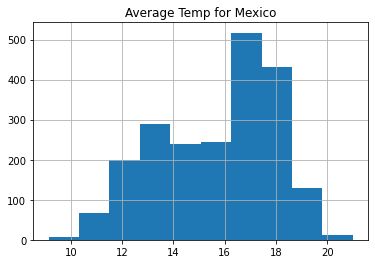

In [52]:
mexico_data.Avg_Temp.hist()
plt.title('Average Temp for Mexico')
plt.show()

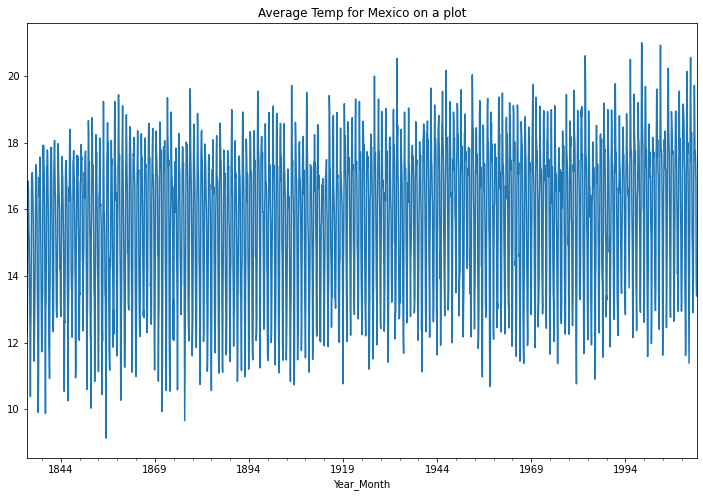

In [53]:
plt.figure(figsize=(12,8))

mexico_data.Avg_Temp.plot()

plt.title('Average Temp for Mexico on a plot')
plt.show()

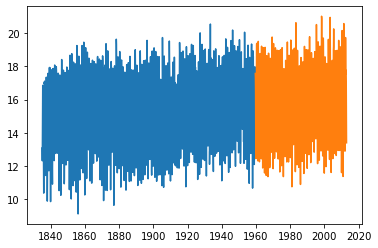

In [55]:
train_size = .70
n = mexico_data.shape[0]
test_start_index = round(train_size * n)

train = mexico_data[:test_start_index] # everything up (not including) to the test_start_index
test = mexico_data[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.Avg_Temp)
plt.plot(test.index, test.Avg_Temp)

In [56]:
y = train.Avg_Temp
y.head()


Year_Month
1835-01-01    13.09
1835-02-01    12.32
1835-03-01    13.87
1835-04-01    16.31
1835-05-01    16.85
Name: Avg_Temp, dtype: float64

<AxesSubplot:ylabel='Frequency'>

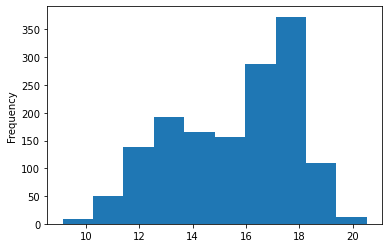

In [57]:
y.plot.hist()


[Text(0.5, 1.0, 'Average Temperature by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Temp (F)')]

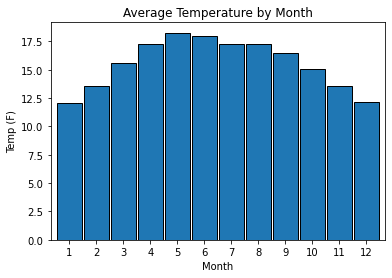

In [58]:
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Temperature by Month', xlabel='Month', ylabel='Temp (F)')




[Text(0.5, 1.0, 'Average Temperature by Weekday'),
 Text(0.5, 17.200000000000003, 'Weekday'),
 Text(17.200000000000003, 0.5, 'Temp (F)')]

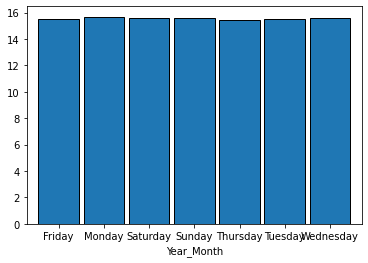

In [59]:
y.groupby(y.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Temperature by Weekday', xlabel='Weekday', ylabel='Temp (F)')


<AxesSubplot:xlabel='Year_Month'>

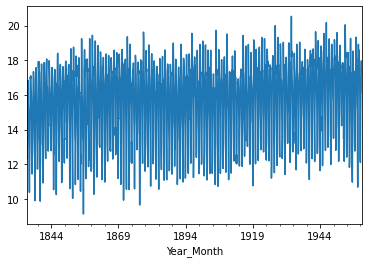

In [65]:
y.plot()



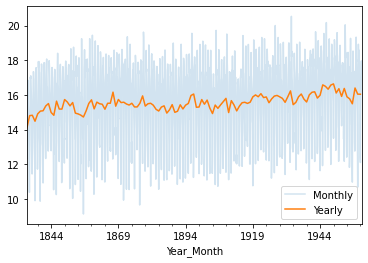

In [69]:
y.plot(alpha=.2, label='Monthly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()


<AxesSubplot:title={'center':'Average Month to Month change in temperature'}, xlabel='Year_Month'>

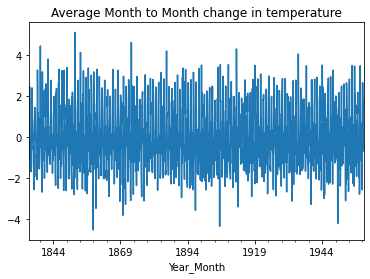

In [72]:
y.resample('M').mean().diff().plot(title='Average Month to Month change in temperature')


<AxesSubplot:title={'center':'Average Year-to-Year change in temperature'}, xlabel='Year_Month'>

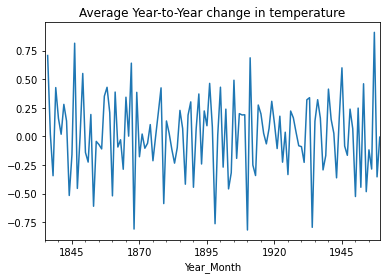

In [74]:
y.resample('Y').mean().diff().plot(title='Average Year-to-Year change in temperature')


<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='Year_Month'>

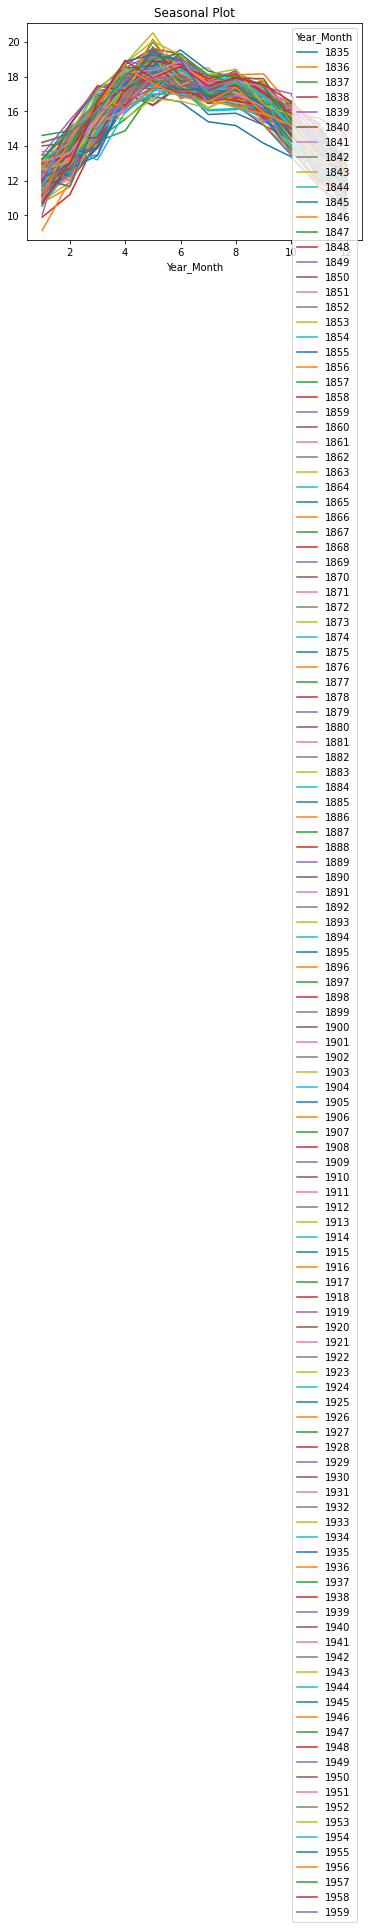

In [75]:
# .unstack turns an index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')


In [80]:
print (glt_mcity.City.unique())


['Abidjan' 'Addis Abeba' 'Ahmadabad' 'Aleppo' 'Alexandria' 'Ankara'
 'Baghdad' 'Bangalore' 'Bangkok' 'Belo Horizonte' 'Berlin' 'Bogotá'
 'Bombay' 'Brasília' 'Cairo' 'Calcutta' 'Cali' 'Cape Town' 'Casablanca'
 'Changchun' 'Chengdu' 'Chicago' 'Chongqing' 'Dakar' 'Dalian'
 'Dar Es Salaam' 'Delhi' 'Dhaka' 'Durban' 'Faisalabad' 'Fortaleza' 'Gizeh'
 'Guangzhou' 'Harare' 'Harbin' 'Ho Chi Minh City' 'Hyderabad' 'Ibadan'
 'Istanbul' 'Izmir' 'Jaipur' 'Jakarta' 'Jiddah' 'Jinan' 'Kabul' 'Kano'
 'Kanpur' 'Karachi' 'Kiev' 'Kinshasa' 'Lagos' 'Lahore' 'Lakhnau' 'Lima'
 'London' 'Los Angeles' 'Luanda' 'Madras' 'Madrid' 'Manila' 'Mashhad'
 'Melbourne' 'Mexico' 'Mogadishu' 'Montreal' 'Moscow' 'Nagoya' 'Nagpur'
 'Nairobi' 'Nanjing' 'New Delhi' 'New York' 'Paris' 'Peking' 'Pune'
 'Rangoon' 'Rio De Janeiro' 'Riyadh' 'Rome' 'São Paulo' 'Saint Petersburg'
 'Salvador' 'Santiago' 'Santo Domingo' 'Seoul' 'Shanghai' 'Shenyang'
 'Singapore' 'Surabaya' 'Surat' 'Sydney' 'Taipei' 'Taiyuan' 'Tangshan'
 'Tianjin' 'Toky

In [89]:
chicago_data = glt_mcity[glt_mcity['City'] == 'Alexandria'] 

In [90]:
chicago_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2669 entries, 9224 to 11892
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   dt                             2669 non-null   object 
 1   AverageTemperature             2666 non-null   float64
 2   AverageTemperatureUncertainty  2666 non-null   float64
 3   City                           2669 non-null   object 
 4   Country                        2669 non-null   object 
 5   Latitude                       2669 non-null   object 
 6   Longitude                      2669 non-null   object 
dtypes: float64(2), object(5)
memory usage: 166.8+ KB


In [91]:
chicago_data.to_csv('chicago_data.csv')

In [170]:
berlin_data = glt_mcity[glt_mcity['City'] == 'Berlin'] 
berlin_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3239 entries, 24500 to 27738
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   dt                             3239 non-null   object 
 1   AverageTemperature             3166 non-null   float64
 2   AverageTemperatureUncertainty  3166 non-null   float64
 3   City                           3239 non-null   object 
 4   Country                        3239 non-null   object 
 5   Latitude                       3239 non-null   object 
 6   Longitude                      3239 non-null   object 
dtypes: float64(2), object(5)
memory usage: 202.4+ KB


In [171]:
berlin_data.dt= pd.to_datetime(berlin_data.dt)

In [172]:
berlin_data = berlin_data[(berlin_data['dt'].dt.year != 2013)]

In [173]:
berlin_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3230 entries, 24500 to 27729
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             3230 non-null   datetime64[ns]
 1   AverageTemperature             3158 non-null   float64       
 2   AverageTemperatureUncertainty  3158 non-null   float64       
 3   City                           3230 non-null   object        
 4   Country                        3230 non-null   object        
 5   Latitude                       3230 non-null   object        
 6   Longitude                      3230 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 201.9+ KB


In [174]:
berlin_data = berlin_data[(berlin_data['dt'].dt.year >= 1835)]

In [175]:
berlin_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2136 entries, 25594 to 27729
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             2136 non-null   datetime64[ns]
 1   AverageTemperature             2136 non-null   float64       
 2   AverageTemperatureUncertainty  2136 non-null   float64       
 3   City                           2136 non-null   object        
 4   Country                        2136 non-null   object        
 5   Latitude                       2136 non-null   object        
 6   Longitude                      2136 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 133.5+ KB


In [176]:
berlin_data.to_csv('berlin_data.csv')

In [177]:
berlin_data = berlin_data.reset_index()
berlin_data = berlin_data.replace(to_replace="Berlin", value="Berlin, Germany")
berlin_data = berlin_data.drop(['index','Latitude','Longitude','Country'], axis=1)
berlin_data = berlin_data.round(2)
berlin_data = berlin_data.rename(columns = {"dt": "Year_Month","AverageTemperature":"Avg_Temp", "AverageTemperatureUncertainty":"Avg_Temp_Uncerty"})
berlin_data = berlin_data.set_index('Year_Month')


In [178]:
berlin_data.head()

,Avg_Temp,Avg_Temp_Uncerty,City
Year_Month,,,
1835-01-01,1.06,2.60,"Berlin, Germany"
1835-02-01,2.88,2.24,"Berlin, Germany"
1835-03-01,4.05,2.20,"Berlin, Germany"
1835-04-01,7.40,2.74,"Berlin, Germany"
1835-05-01,12.64,1.53,"Berlin, Germany"


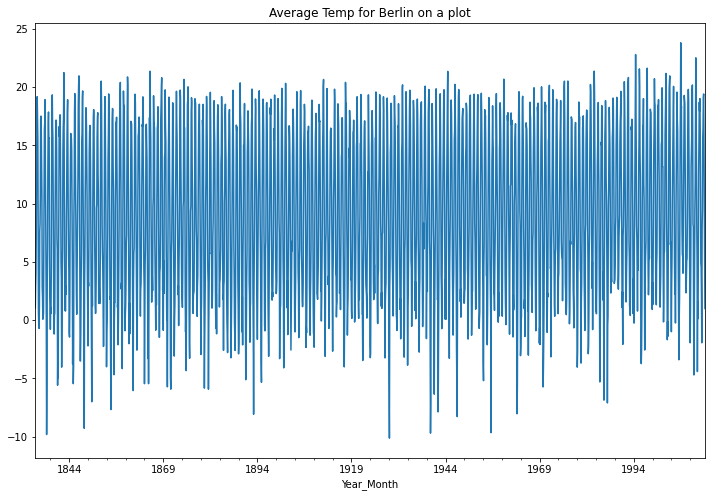

In [179]:
plt.figure(figsize=(12,8))

berlin_data.Avg_Temp.plot()

plt.title('Average Temp for Berlin on a plot')
plt.show()

In [180]:
berlin_data.to_csv('berlin_data.csv')


In [181]:
y = train.Avg_Temp.resample('M').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
Year_Month,,,,
1835-01-31,1.06,NaN,-9.647728,NaN
1835-02-28,2.88,NaN,-8.258230,NaN
1835-03-31,4.05,NaN,-5.215630,NaN
1835-04-30,7.40,NaN,-0.678149,NaN
1835-05-31,12.64,NaN,4.424824,NaN


<AxesSubplot:xlabel='Year_Month'>

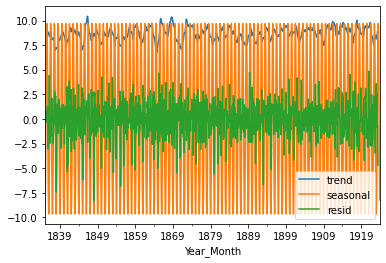

In [182]:
decomposition.iloc[:, 1:].plot()


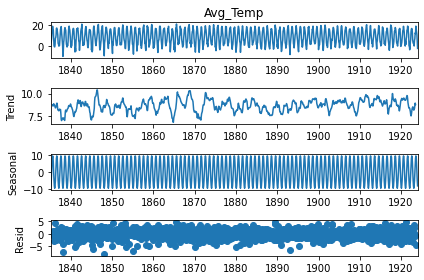

In [183]:
# the value returned from seasonal_decompose can itself be plotted:
result.plot()
None


In [184]:
train = train.resample('Y').mean()
# create a categorical feature
train['temp_bin'] = pd.qcut(train.Avg_Temp, 4, labels=['cold', 'cool', 'warm', 'hot'])
train.groupby('temp_bin').mean()


,Avg_Temp,Avg_Temp_Uncerty
temp_bin,,
cold,7.713514,1.000543
cool,8.454015,0.645189
warm,8.931326,0.963447
hot,9.535758,0.674015


Text(0, 0.5, '% of days in the month')

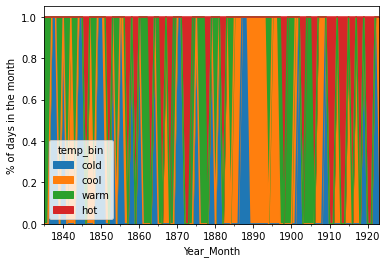

In [185]:
(train.groupby('temp_bin')
 .resample('Y')
 .size()
 .unstack(0)
 .apply(lambda row: row / row.sum(), axis=1)
 .plot.area()
)
plt.ylabel('% of days in the month')


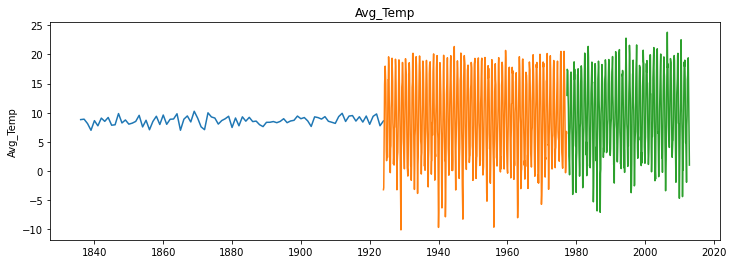

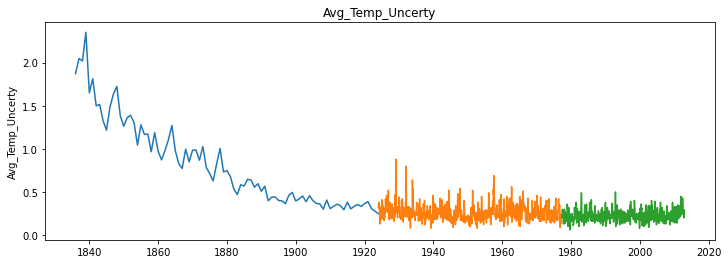

KeyError: 'temp_bin'

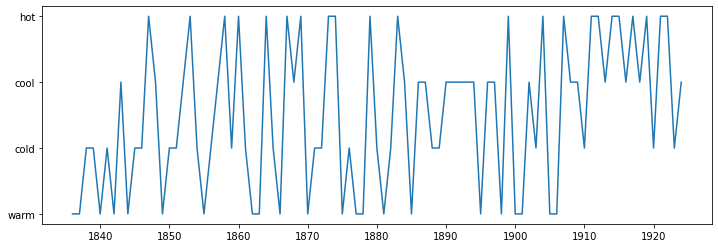

In [186]:
for col in train.columns:
    plt.figure(figsize=(12,4))
    plt.plot(train[col])
    plt.plot(validate[col])
    plt.plot(test[col])
    plt.ylabel(col)
    plt.title(col)
    plt.show()

In [187]:
berlin_data = berlin_data.drop(['City'], axis=1)

train_size = int(len(berlin_data) * .5)
validate_size = int(len(berlin_data) * .3)
test_size = int(len(berlin_data) - train_size - validate_size)
validate_end_index = train_size + validate_size

# split into train, validation, test
train = berlin_data[: train_size]
validate = berlin_data[train_size : validate_end_index]
test = berlin_data[validate_end_index : ]


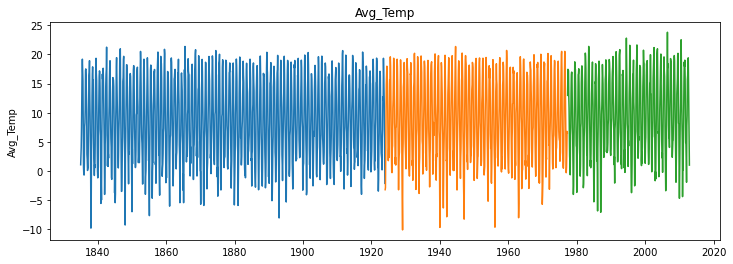

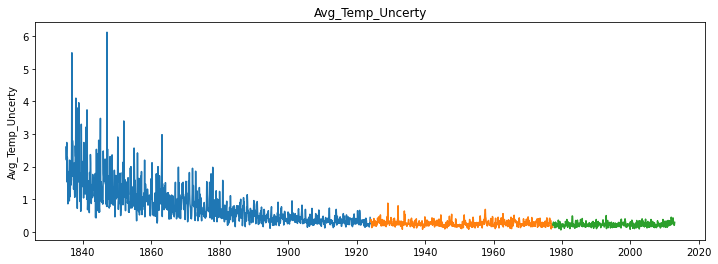

In [188]:
for col in train.columns:
    plt.figure(figsize=(12,4))
    plt.plot(train[col])
    plt.plot(validate[col])
    plt.plot(test[col])
    plt.ylabel(col)
    plt.title(col)
    plt.show()


In [189]:
# evaluation function to compute rmse
def evaluate(target_var):
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 0)
    return rmse


In [190]:
# plot and evaluate 
def plot_and_eval(target_var):
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label = 'Train', linewidth = 1)
    plt.plot(validate[target_var], label = 'Validate', linewidth = 1)
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    rmse = evaluate(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()


In [191]:
# Create the empty dataframe
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])

# function to store rmse for comparison purposes
def append_eval_df(model_type, target_var):
    rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var], 'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)


In [203]:
Temp = round(train['Avg_Temp'].mean(), 2)


yhat_df = pd.DataFrame({'Avg_Temp': [Temp],
                           }, index = validate.index)

yhat_df.head(3)


,Avg_Temp
Year_Month,
1924-01-01,8.65
1924-02-01,8.65
1924-03-01,8.65


Avg_Temp -- RMSE: 7


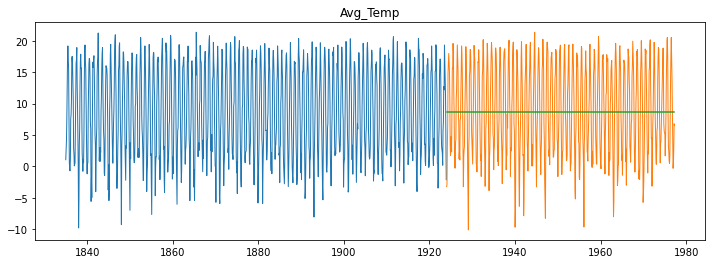

KeyError: 'Avg_Temp_Uncerty'

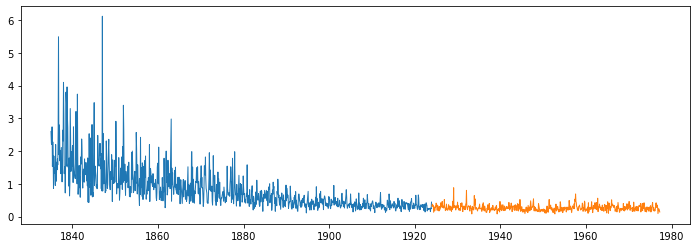

In [204]:
for col in train.columns:
    plot_and_eval(col)


In [205]:
for col in train.columns:
    eval_df = append_eval_df(model_type='simple_average', 
                             target_var = col)
eval_df


KeyError: 'Avg_Temp_Uncerty'

In [206]:
# compute a 30 day rolling average, 
# use the most recent/last 30 day period value to predict forward. 

period = 10

temp = round(train['Avg_Temp'].rolling(period).mean().iloc[-1], 2)


# yhat_df = make_predictions()

yhat_df = pd.DataFrame({'Avg_Temp': [temp]
                           }, index = validate.index)
yhat_df.head(2)


,Avg_Temp
Year_Month,
1924-01-01,10.07
1924-02-01,10.07


Avg_Temp -- RMSE: 7


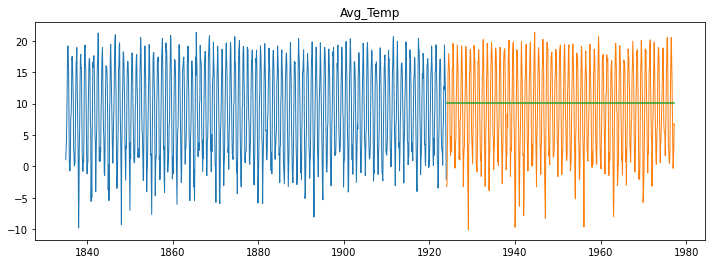

KeyError: 'Avg_Temp_Uncerty'

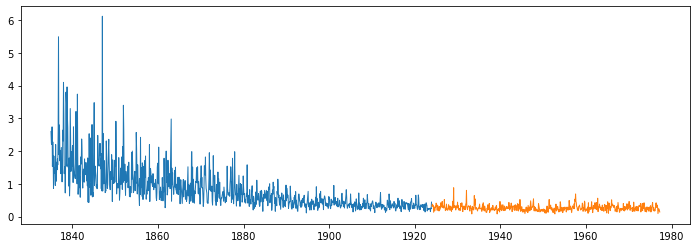

In [207]:
for col in train.columns:
    plot_and_eval(col)


In [208]:
for col in train.columns:
    eval_df = append_eval_df(model_type='30d moving average', 
                             target_var = col)
eval_df


KeyError: 'Avg_Temp_Uncerty'